# SVM 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df=pd.read_csv(r"D:\STUDY\MACHINE_LEARNING\6 support vector machine\diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
x=df[["BMI", "Glucose"]]

In [15]:
y=df["Outcome"]

<Axes: xlabel='Glucose', ylabel='BMI'>

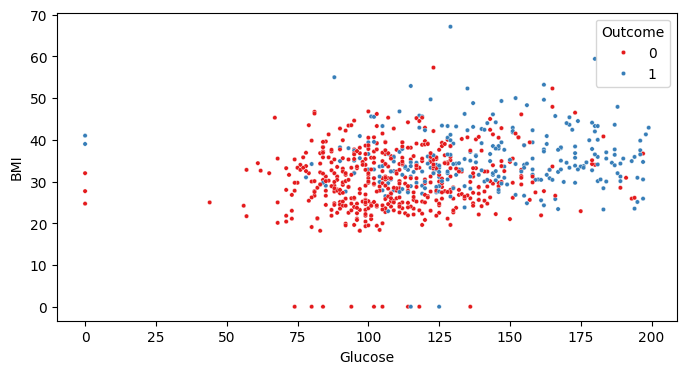

In [27]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['Outcome'], palette='Set1', s=10)

In [28]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)


Text(0.5, 1.0, 'train data')

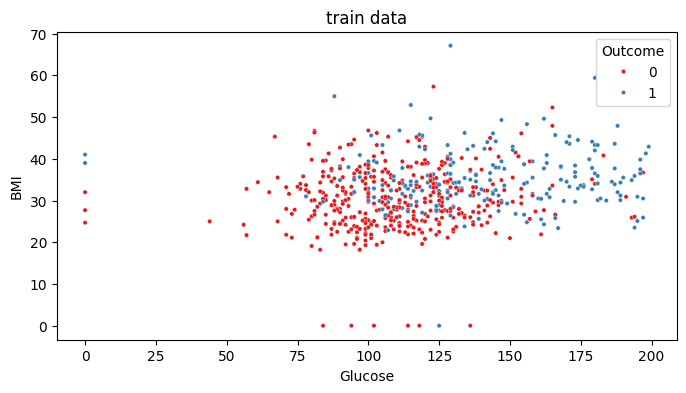

In [30]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=x_train['Glucose'], y=x_train['BMI'], hue=y_train, palette='Set1', s=10)
plt.title("train data")

Text(0.5, 1.0, 'Test data')

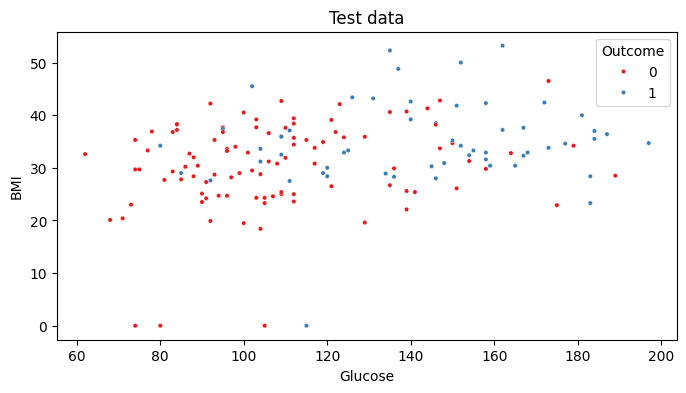

In [31]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=x_test['Glucose'], y=x_test['BMI'], hue=y_test, palette='Set1', s=10)
plt.title("Test data")

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)

Text(0.5, 1.0, 'Test data scaled')

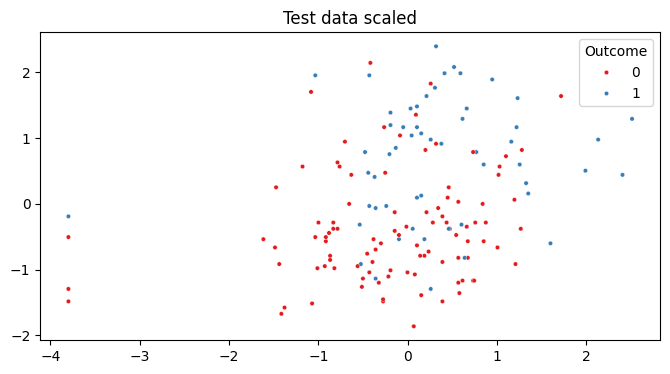

In [37]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=x_test_scaler[:,0], y=x_test_scaler[:,1], hue=y_test, palette='Set1', s=10)
plt.title("Test data scaled")

Text(0.5, 1.0, 'Train data scaled')

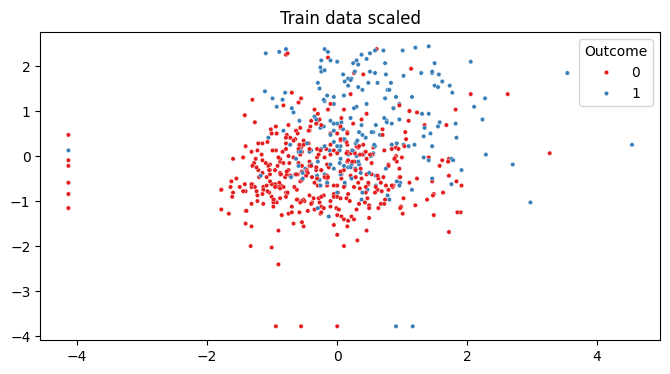

In [38]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=x_train_scaler[:,0], y=x_train_scaler[:,1], hue=y_train, palette='Set1', s=10)
plt.title("Train data scaled")

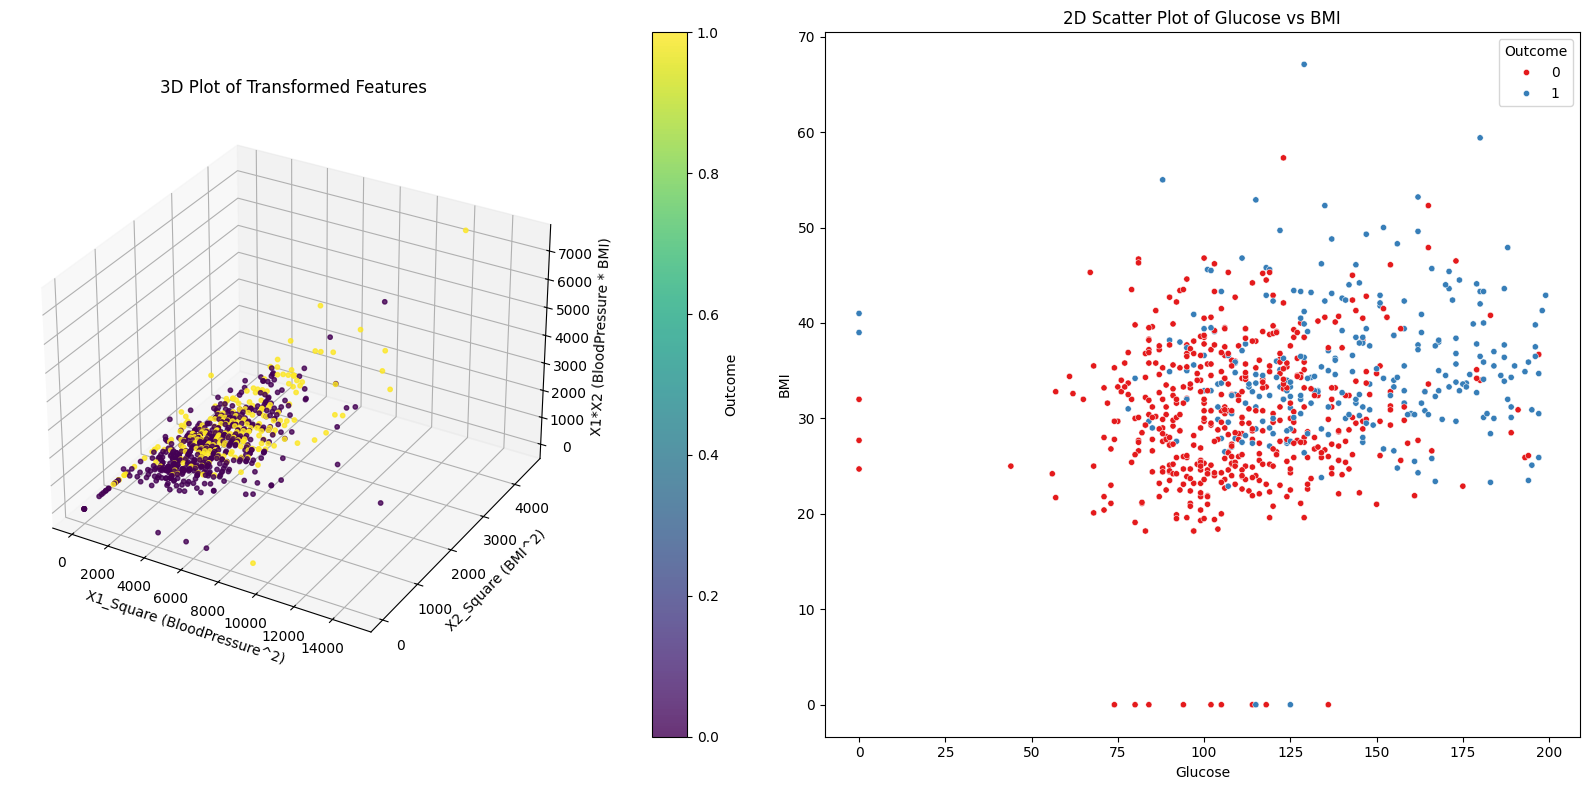

In [75]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['BloodPressure']**2
df['X2_Square']= df['BMI']**2
df['X1*X2'] = (df['BloodPressure'] *df['BMI'])

# Create a figure for both plots
fig = plt.figure(figsize=(16, 8))

# 3D Scatter Plot (left)
ax1 = fig.add_subplot(121, projection='3d')
sc = ax1.scatter(df['X1_Square'], df['X2_Square'], df['X1*X2'], 
                 c=df['Outcome'], cmap='viridis', alpha=0.8 ,s=10)
ax1.set_xlabel('X1_Square (BloodPressure^2)')
ax1.set_ylabel('X2_Square (BMI^2)')
ax1.set_zlabel('X1*X2 (BloodPressure * BMI)')
ax1.set_title('3D Plot of Transformed Features')
cbar = plt.colorbar(sc, ax=ax1, pad=0.1)
cbar.set_label('Outcome')

# 2D Scatter Plot (right)
ax2 = fig.add_subplot(122)
sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['Outcome'], palette='Set1', s=20, ax=ax2)
ax2.set_xlabel('Glucose')
ax2.set_ylabel('BMI')
ax2.set_title('2D Scatter Plot of Glucose vs BMI')
ax2.legend(title='Outcome')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()